In [ ]:
# !pip install deeprobust
# !conda install pytorch torchvision torchaudio -c pytorch
import torch
# print(torch.__version__)
!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-geometric
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.generators.community import stochastic_block_model
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.generators.community import random_partition_graph

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import math
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import FactorAnalysis

import random



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 47.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=b75cfe10e00152386a68c5fa62072c9b094eaaf1edb053096af0975180187292
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


In [ ]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import Tensor
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
import networkx as nx
from networkx.algorithms import community
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

In [ ]:
import numpy
import torch
%load_ext autoreload
%autoreload 2

%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))



from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.generators.community import stochastic_block_model
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.generators.community import random_partition_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import math
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from random import sample

In [ ]:
# from deeprobust.graph.data import Dataset

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse import csgraph
from scipy.sparse.linalg import inv

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from torch_geometric.datasets import WebKB
from torch_geometric.utils import to_dense_adj,homophily
dataset = WebKB(root='/wisconsin',name='wisconsin')
# dataset = Planetoid(root=data_dir, name='Cora')
# dataset = Planetoid(root=data_dir, name='Citeseer')
# dataset = Planetoid(root=data_dir, name='PubMed')
dataset

Processing...
Done!


wisconsin()

In [ ]:
data = dataset[0]
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of classes: {dataset.num_classes}')

Number of nodes: 251
Number of edges: 515
Number of classes: 5


In [ ]:
from torch_geometric.datasets import WebKB
from torch_geometric.utils import to_dense_adj,homophily


# dataset = WebKB(root='/Texas',name='Texas')
# print(dataset[0])

edge_list = dataset[0].edge_index
NO_OF_EDGES = edge_list.shape[1]
labels = dataset[0].y

print("Homophilic ratio : " + str(homophily(edge_list,labels,method='edge')))


adj = to_dense_adj(dataset[0].edge_index)
adj = adj[0]

labels = labels.numpy()

X = dataset[0].x
X = X.to_dense()
N = X.shape[0]
NO_OF_CLASSES = 5

sparsity_original = 2*NO_OF_EDGES/(N*(N-1))
print("Sparsity of original graph : " + str(sparsity_original))


print(X.shape, adj.shape)

nn = int(1*N)
X = X[:nn,:]
adj = adj[:nn,:nn]
labels = labels[:nn]
print(X.shape,adj.shape)

# plot_graph(dataset[0])


Homophilic ratio : 0.19611650705337524
Sparsity of original graph : 0.016414342629482073
torch.Size([251, 1703]) torch.Size([251, 251])
torch.Size([251, 1703]) torch.Size([251, 251])


In [ ]:
def get_laplacian(adj):
    b=torch.ones(adj.shape[0])
    return torch.diag(adj@b)-adj

theta = get_laplacian(adj)
print(theta.shape)


torch.Size([251, 251])


In [ ]:
# dataset_name = 'flickr' 

# data = Dataset(root='', name=dataset_name, setting='gcn',seed=10)

# adj, features, labels = data.adj, data.features, data.labels
# idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test

# theta = csgraph.laplacian(adj).tocsr()
features = X.numpy()
NO_OF_NODES = X.shape[0]
# NO_OF_CLASSES =  7


print(NO_OF_CLASSES,NO_OF_NODES)

5 251


In [ ]:
def convertScipyToTensor(coo):
  try:
    coo = coo.tocoo()
  except:
    coo = coo
  values = coo.data
  indices = np.vstack((coo.row, coo.col))

  i = torch.LongTensor(indices)
  v = torch.FloatTensor(values)
  shape = coo.shape

  return torch.sparse.FloatTensor(i, v, torch.Size(shape))

In [ ]:
from scipy.sparse import random
from scipy.sparse.linalg import norm
from scipy.sparse import csr_matrix

p = X.shape[0]
k = int(p*0.5)
n = X.shape[1]
lambda_param = 100
beta_param = 50
alpha_param = 100
gamma_param = 100
lr = 1e-5
thresh = 1e-10

from scipy.sparse import random
from scipy.stats import rv_continuous
class CustomDistribution(rv_continuous):
    def _rvs(self,  size=None, random_state=None):
        return random_state.standard_normal(size)
temp = CustomDistribution(seed=1)
temp2 = temp()  # get a frozen version of the distribution
X_tilde = random(k, n, density=0.25, random_state=1, data_rvs=temp2.rvs)
C = random(p, k, density=0.25, random_state=1, data_rvs=temp2.rvs)
P = random(k, p, density=0.25, random_state=1, data_rvs=temp2.rvs)



In [ ]:
def experiment(lambda_param,beta_param,alpha_param,gamma_param,C,X_tilde,theta,X):
      p = X.shape[0]
      k = int(p*0.5)
      n = X.shape[1]
      ones = csr_matrix(np.ones((k,k)))
      ones = convertScipyToTensor(ones)
      ones = ones.to_dense()
      J = np.outer(np.ones(k), np.ones(k))/k
      J = csr_matrix(J)
      J = convertScipyToTensor(J)
      J = J.to_dense()
      zeros = csr_matrix(np.zeros((p,k)))
      zeros = convertScipyToTensor(zeros)
      zeros = zeros.to_dense()
      X_tilde = convertScipyToTensor(X_tilde)
      X_tilde = X_tilde.to_dense()
      C = convertScipyToTensor(C)
      C = C.to_dense()
      eye = torch.eye(k)
      try:
        theta = convertScipyToTensor(theta)
      except:
        theta = theta
      try:
        X = convertScipyToTensor(X)
        X = X.to_dense()
      except:
        X = X

      # if(torch.cuda.is_available()):
      #   # print("yes")
      #   X_tilde = X_tilde.cuda()
      #   C = C.cuda()
      #   theta = theta.cuda()
      #   X = X.cuda()
      #   J = J.cuda()
      #   zeros = zeros.cuda()
      #   ones = ones.cuda()
      #   eye = eye.cuda()

      def update(X_tilde,C,i):
          global L
          thetaC = theta@C
          CT = torch.transpose(C,0,1)
          X_tildeT = torch.transpose(X_tilde,0,1)
          CX_tilde = C@X_tilde
          t1 = CT@thetaC + J
          term_bracket = torch.linalg.pinv(t1)
          thetacX_tilde = thetaC@(X_tilde)
          
          L = 1/k

          t1 = -2*gamma_param*(thetaC@term_bracket)
          t2 = alpha_param*(CX_tilde-X)@(X_tildeT)
          t3 = 2*thetacX_tilde@(X_tildeT)
          t4 = lambda_param*(C@ones)
          t5 = 2*beta_param*(thetaC@CT@thetaC)
          T2 = (t1+t2+t3+t4+t5)/L
          Cnew = (C-T2).maximum(zeros)
          t1 = CT@thetaC*(2/alpha_param)
          t2 = CT@C
          t1 = torch.linalg.pinv(t1+t2)
          t1 = t1@CT
          t1 = t1@X
          X_tilde_new = t1
          Cnew[Cnew<thresh] = thresh
          for i in range(len(Cnew)):
              Cnew[i] = Cnew[i]/torch.linalg.norm(Cnew[i],1)
          for i in range(len(X_tilde_new)):
              X_tilde_new[i] = X_tilde_new[i]/torch.linalg.norm(X_tilde_new[i],1)
          return X_tilde_new,Cnew


      for i in tqdm(range(20)):
          X_tilde,C = update(X_tilde,C,i)
    
      return X_tilde,C



In [ ]:
def liftedexperiment(lambda_param,beta_param,alpha_param,gamma_param,P,Xd,theta_c,X_tilde):
      p = Xd.shape[0]
      # k = int(p*0.5)
      n = Xd.shape[1]
      
      ones = csr_matrix(np.ones((p,p)))
      ones = convertScipyToTensor(ones)
      ones = ones.to_dense()
      oness = csr_matrix(np.ones((k,p)))
      oness = convertScipyToTensor(oness)
      oness = oness.to_dense()
      J = np.outer(np.ones(p), np.ones(p))/p
      J = csr_matrix(J)
      J = convertScipyToTensor(J)
      J = J.to_dense()
      zeros = csr_matrix(np.zeros((p,k)))
      zeros = convertScipyToTensor(zeros)
      zeros = zeros
     
      # X_tilde = X_tilde
     
      # P = P
      eye = torch.eye(k)
      # try:
      #   theta = convertScipyToTensor(theta)
      # except:
      #   theta = theta
      # try:
      #   X = convertScipyToTensor(X)
      #   X = X.to_dense()
      # except:
      #   X = X

      

      def update(X,P,i):
          
          global L
          # print("Susi")
          theta_cP = theta_c@P #resultant will be k*p
          # print("Susi")
          PT = torch.transpose(P,0,1)
          XT = torch.transpose(Xd,0,1)
          PX = P@X
          t1 = PT@theta_cP + J #
          term_bracket = torch.linalg.pinv(t1)
          theta_cX = theta_cP@(X) # k*n
          
          L = 1/p

          t1 = -2*gamma_param*(theta_cP@term_bracket) #k*p  ----confused
          t2 = alpha_param*(PX-X_tilde)@(XT) #k*p
          t3 = 2*theta_cX@(XT) #k*p
          t4 = lambda_param*(P@ones) #k*p
          t5 = 2*beta_param*(theta_cP@PT@theta_cP) #k*p
          # t6 = alpha_param*(theta_cP)@(PT@theta_cP)
          # t6 = lambda_param*(oness)
          T2 = (t1+t2+t3+t4+t5)/L
          # print("T2.shape", T2.shape)
          # print("P.shape", P.shape)
          Pnew = (P.to_dense() - T2.to_dense()).clamp_min(0)
          # Pnew = (P-T2).maximum(zeros)
          
          t1 = PT@theta_cP*(2/alpha_param) #p*p
          t2 = PT@P #p*p
          t1 = torch.linalg.pinv(t1+t2) #p*p
          t1 = t1@PT #p*k
          t1 = t1@X_tilde #p*n ---dim of X
          X_new = t1
          Pnew[Pnew<thresh] = thresh
          for i in range(len(Pnew)):
              Pnew[i] = Pnew[i]/torch.linalg.norm(Pnew[i],1)
          for i in range(len(X_new)):
            X_new[i] = X_new[i]/torch.linalg.norm(X_new[i],1)
          return X_new,Pnew


      for i in tqdm(range(20)):
          X,P = update(Xd,P,i)
    
      return Xd,P




In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(X.shape[1], 64)
        self.conv2 = GCNConv(64, NO_OF_CLASSES)

    def reset_parameters(self):
        self.conv1.reset_parameters()
        self.conv2.reset_parameters()

    def forward(self, x, edge_index):

        #print("Checking 1: x", x.shape, "Edge index:", edge_index.shape)
        x = self.conv1(x, edge_index)
        #print("Checking 2: convolution done, new x:", x.shape)
        x = F.relu(x)
        #print("Checking 3: x", x.shape, "training:", self.training)
        x = F.dropout(x, training=self.training)
        #print("Checking 4: dropout done new x", x.shape, "Edge index:", edge_index.shape)
        x = self.conv2(x, edge_index)
        #print("Checking 5: x", x.shape)

        return F.log_softmax(x, dim=1)



In [ ]:
from random import sample

In [ ]:
from torch_geometric.utils import dense_to_sparse,homophily

def get_accuracy(C_0,L,X_t_0):
    global labels, NO_OF_CLASSES,p
    t=[]
    for i in [1,2,3,4,5,6,7,8,9,10]: 
        C_0_new=np.zeros(C_0.shape)
        for i in range(C_0.shape[0]):
            C_0_new[i][np.argmax(C_0[i])]=1
        # print(C_0_new)
        # C_0_new=C_0
        from scipy import sparse
        #Lc=C_0.T@L@C_0
        Lc=C_0_new.T@L@C_0_new
        # print("L:", Lc.shape)
        # Lc=L_new
        #print(Lc)
        Wc=(-1*Lc)*(1-np.eye(Lc.shape[0]))
        # print("W:", Wc.shape)
        Wc[Wc<0.1]=0
        Wc=sparse.csr_matrix(Wc)
        Wc = Wc.tocoo()
        row = torch.from_numpy(Wc.row).to(torch.long)
        col = torch.from_numpy(Wc.col).to(torch.long)
        edge_index_coarsen2 = torch.stack([row, col], dim=0)
        #print("edgecoarsen:", edge_index_coarsen2.shape)
        edge_weight = torch.from_numpy(Wc.data)
        #print("edgeweight:", edge_weight.shape)
        def one_hot(x, class_count):
            return torch.eye(class_count)[x, :]

        device = torch.device('cpu')
        labels=labels
        Y = labels
        #print("Y:", Y.shape)
        Y = one_hot(Y,NO_OF_CLASSES)
        # NO_OF_CLASSES=Y.shape[1]
        P=np.linalg.pinv(C_0_new)
        labels_coarse = torch.argmax(torch.sparse.mm(torch.Tensor(P).double() , Y.double()).double() , 1)
        #print("Lables:", labels_coarse.shape)

        #torch.Tensor(C2)@X
        # Wc[Wc<0.01]=0
        Wc=Wc.toarray()
        adjtemp = torch.tensor(Wc)
        edge_list_temp = dense_to_sparse(adjtemp)[0]
        # print(edge_list_temp)
        # print(labels_coarse)
        print("Homophilic ratio : " + str(homophily(edge_list_temp,labels_coarse,method='edge')))
        number_of_edges = edge_list_temp.shape[1]
        n = labels_coarse.shape[0]
        sparsity = 2*number_of_edges/(n*(n-1))
        print("Sparsity : " + str(sparsity))
    
        #
        C2=np.linalg.pinv(C_0_new)
        model=Net().to(device)
        device = torch.device('cpu')
        lr=0.01
        decay=0.0001
        try:
          X=np.array(features.todense())
        except:
          X = np.array(features)
        #print("X:",X.shape)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=decay)
        # criterion=torch.nn.CrossEntropyLoss()
        x=sample(range(0, int(k)), k)
      
        from datetime import datetime
        Xt=P@X
        # Xt=X_t_0
        def train():
            model.train()
            optimizer.zero_grad()
            out = model(torch.Tensor(Xt).to(device),edge_index_coarsen2)
            loss = F.nll_loss(out[x], labels_coarse[x])
            loss.backward()
            optimizer.step()
            return loss
        now1 = datetime.now()
        losses=[]
        for epoch in range(100):
            loss=train()
            losses.append(loss)
            if(epoch%100==0):
                print(f'Epoch: {epoch:03d},loss: {loss:.4f}')
        now2 = datetime.now()        
        pred=model(torch.Tensor(Xt).to(device),edge_index_coarsen2).argmax(dim=1)        
        def train_accuracy():
            model.eval()
            correct = (pred[x] == labels_coarse[x]).sum()
            acc = int(correct) /len(x)
            return acc
    
        t+=[(now2-now1).total_seconds()]

        zz=sample(range(0, int(NO_OF_NODES)), NO_OF_NODES)
        Wc=sparse.csr_matrix(adj)
        Wc = Wc.tocoo()
        row = torch.from_numpy(Wc.row).to(torch.long)
        col = torch.from_numpy(Wc.col).to(torch.long)
        edge_index_coarsen = torch.stack([row, col], dim=0)
        edge_weight = torch.from_numpy(Wc.data)
        pred=model(torch.Tensor(X),edge_index_coarsen).argmax(dim=1)
        pred=np.array(pred)
        correct =(pred[zz]==labels[zz]).sum()
        acc = int(correct) /NO_OF_NODES
        return acc



In [ ]:
from torch_geometric.utils import dense_to_sparse,homophily

def getSparsityAndHomophily(C,theta):
    theta = C.T@theta@C
    adjtemp = -theta
    for i in range(adjtemp.shape[0]):
      adjtemp[i,i]=0
    adjtemp[adjtemp<0.01]=0
    temp = dense_to_sparse(adjtemp)
    edge_list_temp = temp[0]
    # ytemp = temp[1]
    # P = torch.linalg.pinv(C)
    # labels = 
    # # print(edge_list)
    number_of_edges = edge_list_temp.shape[1]
    # n = adjtemp.shape[0]

    # print("Homophilic ratio : " + str(homophily(edge_list_temp,ytemp,method='node')))
    sparsity = 2*number_of_edges/(n*(n-1))
    print("Sparsity : " + str(sparsity))
    

In [ ]:
def getREE(E1,E2):
    ree= 0
    for i in range(len(E1)):
      ree += torch.abs(E1[i]-E2[i])/torch.abs(E1[i])
      # print(ree)
    ree=(ree/len(E1))
    # print(ree)
    return(float(ree.item()))

    

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
from torch_geometric.utils import dense_to_sparse,homophily
        # sns.heatmap(C_0.T@C_0)
        
# concatenate the two tensors along dimension 0
y = 10000.000
gamma_param_min = 0
alpha_param_min = 0
beta_param_min = 0
lambda_param_min = 0
#0.0001,0.0001,10,0.0001
# for lambda_param in [ 0.0001,0.001,1,0.01]:
#   for beta_param in [ 0.0001,0.001,1,0.01]:
#     for alpha_param in [  0.0001,0.001,1,0.01]:
#       for gamma_param in [  0.0001,0.001,1,0.01]:
for lambda_param in [100]:
   for beta_param in [50]:
     for alpha_param in [100]:
       for gamma_param in [100]:

        
        # REE_f = []
        for _ in range(1):

          X_tilde = random(k, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
          C = random(p, k, density=0.15, random_state=1, data_rvs=temp2.rvs)

          # try:

          X_t_0,C_0 = experiment(lambda_param,beta_param,alpha_param,gamma_param,C,X_tilde,theta,X)
          L = theta


          Xd = random(p, n, density=0.15, random_state=1, data_rvs=temp2.rvs)
          P = random(k, p, density=0.15, random_state=1, data_rvs=temp2.rvs)
          X_tilde = X_t_0
          theta_c = torch.transpose(C_0,0,1)@theta@C_0
          # print(type(X_t_0))
          Xd = convertScipyToTensor(Xd)
          Xd = Xd.to_dense()
          P = convertScipyToTensor(P)
          P = P.to_dense()
          X_0,P_0 = liftedexperiment(lambda_param,beta_param,alpha_param,gamma_param,P,Xd,theta_c,X_tilde)
          

          #Comparision between Original graph and coarsened graph feature matrix

          U_t_0, S_t_0, V_t_0 = torch.svd(X) #original feature matrix
          U_0, S_0, V_0 = torch.svd(X_0) #decoarsened feature matrix
          S_0 = (S_0-S_0.mean())/(S_0.max())
          S_t_0 = (S_t_0-S_t_0.mean())/(S_t_0.max())
          U_t_c, S_t_c, V_t_c = torch.svd(X_t_0)#coarsened feature matrix
          S_t_c = (S_t_c-S_t_c.mean())/(S_t_c.max())


          #Comparision between Original graph and coarsened graph laplacian matrix
          U_t_1, S_t_1, V_t_1 = torch.svd(theta) #original feature matrix
          U_1, S_1, V_1 = torch.svd(torch.transpose(P_0,0,1)@theta_c@P_0) #decoarsened feature matrix
          S_1 = (S_1-S_1.mean())/(S_1.max())
          S_t_1 = (S_t_1-S_t_1.mean())/(S_t_1.max())
          # U_t_c, S_t_c, V_t_c = torch.svd(X_t_0)#coarsened feature matrix
          # S_t_c = (S_t_c-S_t_c.mean())/(S_t_c.max())



          # print("decoarsened and coarsened",(torch.transpose(P_0,0,1)@theta_c@P_0).shape,theta.shape)
          # import matplotlib.pyplot as plt
          # # Plot the top 100 eigenvalues of both the SVDs
          # plt.plot(range(91), S_t_1[:91], label='original'  + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
          # plt.plot(range(91), S_1[:91], label='de coarsened')
          # # plt.plot(range(91), S_t_1[:91], label='coarsened')
          # plt.xlabel('Index')
          # plt.ylabel('Eigenvalue')
          # plt.title('Top 100 Eigenvalues of SVDs')
          # plt.legend()
          # plt.show()

          


          # print("decoarsened and coarsened",X_0.shape,X_t_0.shape)
          # import matplotlib.pyplot as plt
          # # Plot the top 100 eigenvalues of both the SVDs
          # plt.plot(range(91), S_t_0[:91], label='original')
          # plt.plot(range(91), S_0[:91], label='de coarsened')
          # plt.plot(range(91), S_t_c[:91], label='coarsened')
          # plt.xlabel('Index')
          # plt.ylabel('Eigenvalue')
          # plt.title('Top 100 Eigenvalues of SVDs')
          # plt.legend()
          # plt.show()

          # print("REE :  "+  str(getREE(S_1,S_t_1)) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
          
          x = getREE(S_1,S_t_1)
          
          if(x<y):
            # print("y",y)
            # print("x",x)
            # print(type(x),type(y))
            y = x
            # print("y_updated",y, "lambda", lambda_param)
            gamma_param_min = gamma_param
            alpha_param_min = alpha_param
            beta_param_min = beta_param
            lambda_param_min = lambda_param


          
          # REE_f = REE_f.append(x)
          # print(REE_f)


          
          Ltemp = (C_0.T)@theta@C_0
          adjtemp = -Ltemp
          for i in range(adjtemp.shape[0]):
            adjtemp[i,i]=0
          temp = dense_to_sparse(adjtemp)
          edge_list_temp = temp[0]
          ytemp = temp[1]
          # print(edge_list)
          number_of_edges = edge_list_temp.shape[0]
          n = adjtemp.shape[0]

          print("Homophilic ratio : " + str(homophily(edge_list_temp,ytemp)))
          sparsity = 2*number_of_edges/(n*(n-1))
          print("Sparsity : " + str(sparsity))
          getSparsityAndHomophily(C_0,theta)

          _0 = C_0.cpu().detach().numpy()
          X_0 = X_0.cpu().detach().numpy()
          p_t_0 = P_0.T
          
          try:
            L = L.cpu().detach().numpy()
          except:
            L = L
          
          acc = get_accuracy(p_t_0,L,X_0)
          av.append(acc)
          # if(acc < 0.80):
          #   break
          print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))

          # except:

              # print("SVD DID NOT CONVERGE")

        print("Average accuracy = " + str(np.mean(av)*100)  + " +/- " + str(np.std(av)*100)) 
     

    # # X_t_0 = X_tilde
    # # X = X.cpu().detach().numpy()
print("min error "+ str(y)+ " " + str(lambda_param_min)+" " + str(beta_param_min)+" "+str(alpha_param_min)+" "+str(gamma_param_min))

100%|██████████| 20/20 [00:01<00:00, 15.05it/s]


ValueError: ignored

In [ ]:
print(torch.transpose(P_0,0,1)@theta_c@P_0)

In [ ]:
print(theta)

tensor([[5., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [ ]:
# U_t_1, S_t_1, V_t_1 = torch.svd(theta) #original feature matrix
U_1, S_1, V_1 = torch.svd(torch.transpose(P_0,0,1)@theta_c@P_0) #decoarsened feature matrix

U_t_1, S_t_1, V_t_1 = torch.svd(theta) #original feature matrix

S_1 = (S_1-S_1.mean())/(S_1.max())
S_t_1 = (S_t_1-S_t_1.mean())/(S_t_1.max())

In [ ]:
eigenvalues = np.linalg.eigvals(theta)

In [ ]:
S_t_1 = np.sort(np.abs(eigenvalues[:]))[::-1]

In [ ]:
S_t_1 = (S_t_1-S_t_1.mean())/(S_t_1.max())

In [ ]:
getREE(S_1,S_t_1)

39064.1171875

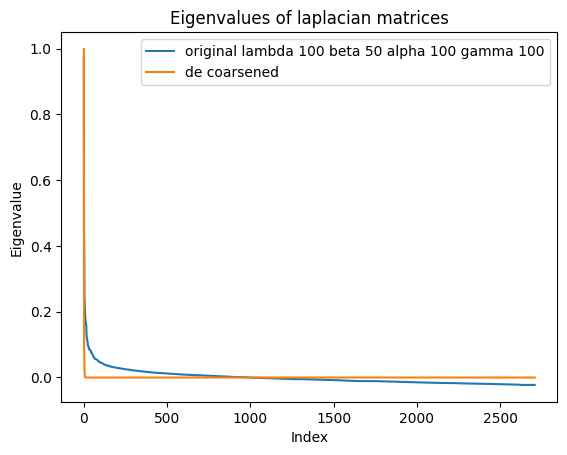

In [ ]:
import matplotlib.pyplot as plt
# Plot the top 100 eigenvalues of both the SVDs
plt.plot(range(len(S_t_1)), S_t_1[:], label='original'  + " lambda " + str(lambda_param_min)+" beta " + str(beta_param_min)+" alpha "+str(alpha_param_min)+" gamma "+str(gamma_param_min))
plt.plot(range(len(S_t_1)), S_1[:], label='de coarsened')
# plt.plot(range(91), S_t_1[:91], label='coarsened')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')

plt.title('Eigenvalues of laplacian matrices')
plt.legend()
plt.show()


In [ ]:
len(S_1)

2703

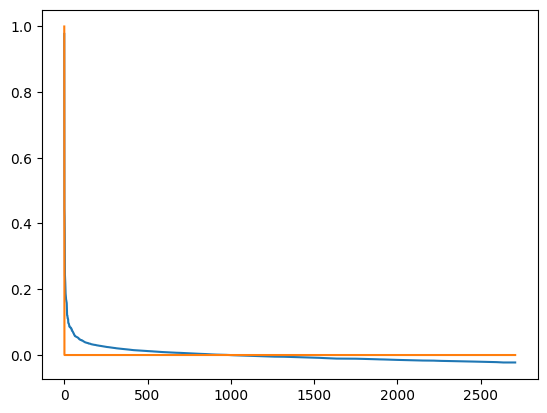

In [ ]:
plt.plot(range(len(S_t_1)), S_t_1[:], label='original'  + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
plt.plot(range(len(S_1)), S_1[:], label='original'  + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))

In [ ]:
torch.svd(torch.transpose(P_0,0,1)@theta_c@P_0)

torch.return_types.svd(
U=tensor([[-0.0189, -0.0086, -0.0088,  ...,  0.0046,  0.0040, -0.0056],
        [-0.0193, -0.0076,  0.0008,  ...,  0.0088, -0.0018, -0.0067],
        [-0.0175, -0.0071, -0.0065,  ...,  0.0048,  0.0091, -0.0035],
        ...,
        [ 0.0113, -0.0388, -0.0421,  ...,  0.0087, -0.0090,  0.0050],
        [-0.0163, -0.0123,  0.0106,  ...,  0.0113,  0.0146, -0.0124],
        [-0.0122, -0.0267,  0.0046,  ..., -0.0503,  0.0407, -0.0049]]),
S=tensor([5.7777e+00, 3.0612e-01, 4.3040e-03,  ..., 1.7555e-08, 1.0455e-08,
        3.6098e-09]),
V=tensor([[-0.0189, -0.0086, -0.0088,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0193, -0.0076,  0.0007,  ..., -0.0007,  0.0006,  0.0006],
        [-0.0175, -0.0071, -0.0065,  ...,  0.0109, -0.0127, -0.0145],
        ...,
        [ 0.0113, -0.0388, -0.0421,  ..., -0.0229, -0.0279, -0.0118],
        [-0.0163, -0.0123,  0.0106,  ..., -0.0123,  0.0055,  0.0114],
        [-0.0122, -0.0267,  0.0046,  ..., -0.0098, -0.0101,  0.0014]]))

In [ ]:
U_t_1, S_t_1, V_t_1 = torch.svd(theta) #original feature matrix
# U_1, S_1, V_1 = torch.svd(torch.transpose(P_0,0,1)@theta_c@P_0) #decoarsened feature matrix

_LinAlgError: ignored

In [ ]:
l0_norm = np.count_nonzero(theta)
print(l0_norm)

13264


In [ ]:
# Get the maximum value
max_value = np.max(theta, axis =0)

print("Maximum value:", max_value)


TypeError: ignored

In [ ]:
# Reshape the tensor into a matrix
matrix = theta.reshape(theta.shape[0], -1)

# Compute the eigenvalues of the matrix
eigenvalues = np.linalg.eigvals(matrix)

print("Eigenvalues:", (np.abs(eigenvalues[8:108])))

Eigenvalues: [100.04485    52.039223   36.306744   35.204075   31.46815    30.535675
  29.278156   27.724566   24.586914   24.221756   22.589943   22.836136
  22.155233   21.019348   20.778603   20.677284   19.522089   18.957264
  18.72288    18.094923   18.012978   17.983418   17.634626   17.730476
  17.38071    17.13838    17.09549    16.994778   16.652262   16.461586
  16.447739   16.352432   16.247898   16.13197    16.086672   16.05102
  15.883774   15.581944   15.386819   15.414569   15.021964   14.576668
  14.423395   14.313269   14.173994   13.986881   13.8917055  13.698833
  13.498093   13.38694    13.265742   13.236895   13.158797   13.154574
  13.07437    13.050374   13.039609   12.806557   12.708285   12.654259
  12.604245   12.420997   12.3838625  12.380384   12.373646   12.220299
  12.328621   12.302326   12.127377   12.140332   12.138116   12.066971
  11.990549   12.056841   11.775917   11.717916   11.677184   11.686904
  12.         12.048107   11.648285   11.598378   11

In [ ]:
S_t_1 = (np.abs(eigenvalues[8:108])-np.abs(eigenvalues[8:108]).mean())/(np.abs(eigenvalues[8:108]).max())

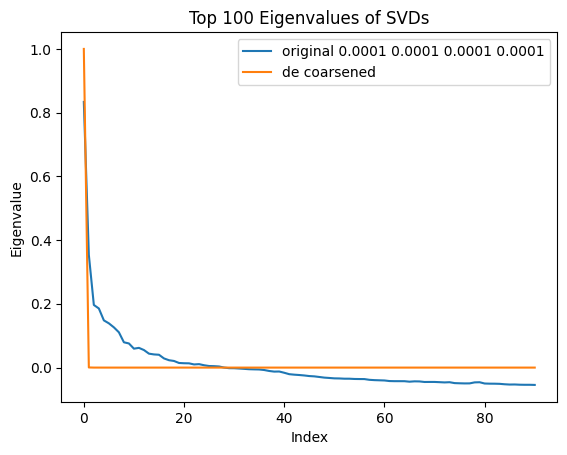

In [ ]:
import matplotlib.pyplot as plt
# Plot the top 100 eigenvalues of both the SVDs
plt.plot(range(91), S_t_1[:91], label='original'  + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
plt.plot(range(91), S_1[:91], label='de coarsened')
# plt.plot(range(91), S_t_1[:91], label='coarsened')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Top 100 Eigenvalues of SVDs')
plt.legend()
plt.show()

In [ ]:
# Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)
print(sorted_eigenvalues[:10])

# # Select the top 100 eigenvalues
# top_100_eigenvalues = sorted_eigenvalues[:100]

# # Calculate the multiplication of the top 100 eigenvalues
# multiplication = np.prod(np.abs(top_100_eigenvalues))

# print("Multiplication of top 100 eigenvalues:", multiplication)

[-6.5294623e-15+0.0000000e+00j -3.6549044e-15+0.0000000e+00j
 -2.0970653e-15-9.8757011e-16j -2.0970653e-15+9.8757011e-16j
 -2.0711995e-15-4.2240306e-17j -2.0711995e-15+4.2240306e-17j
 -1.8603048e-15+0.0000000e+00j -1.4927085e-15+0.0000000e+00j
 -1.3435759e-15+0.0000000e+00j -1.2897085e-15+0.0000000e+00j]


In [ ]:
theta.shape

torch.Size([2708, 2708])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# create a sample graph
# G = nx.Graph()
# G.add_nodes_from([1, 2, 3, 4, 5])
# G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# plot the graph
pos = nx.spring_layout(dataset)  # position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw_networkx_nodes(dataset, pos, node_color='r', node_size=500)
nx.draw_networkx_edges(dataset, pos, edge_color='b', width=2)
nx.draw_networkx_labels(dataset, pos, font_size=12, font_family='sans-serif')
plt.axis('off')
plt.show()

ValueError: ignored

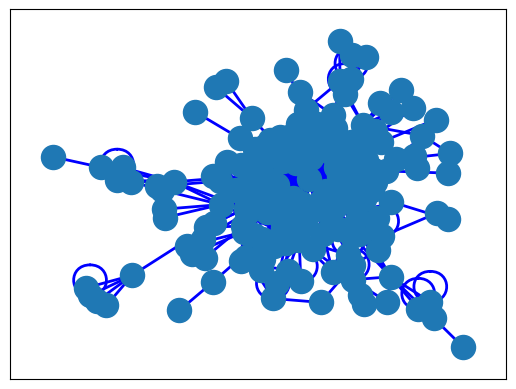

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import WebKB

# Load the WebKB Texas dataset
dataset = WebKB(root='/Texas', name='Texas')

# Get the graph data from the dataset
data = dataset[0]

# Extract the necessary information for plotting
edge_index = data.edge_index
# Additional node or edge attributes can be accessed from data.x or data.edge_attr, if available

# Create a NetworkX graph object
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edge_index.t().tolist())

# Plot the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, edge_color='b', width=2)
plt.show()
